In [1]:
import numpy as np #tính toán số học
import pandas as pd # xử lí dữ liệu dạng bảng
import matplotlib.pyplot as plt # vẽ đồ thị
import seaborn as sns #trực quan hóa dữ liệu mở rộng của matplotlib
import plotly.express as px # vẽ biểu đồ tròn, cột
import plotly.graph_objects as go #tùy chỉnh thành phần trên từng đồ thị
from plotly.subplots import make_subplots #tổ chức và hiển thị nhiều đồ thị trong 1 cửa sổ
import os #tương tác vs hệ thống file/tệp
import random #tạo số ngẫu nhiên
from PIL import Image, ImageEnhance, ImageOps #Xử lí ảnh
from tqdm import tqdm #thanh hiển thị trạng thái
from typing import Tuple, List, Dict, Optional
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

Đường dẫn data

In [2]:
TRAINING_DATA_DIR = 'C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelAI/BTLAI/Train'
TESTING_DATA_DIR = 'C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelAI/BTLAI/Test'
MAX_ROWS_PER_CATEGORY = 5000

In [3]:
meta_data = [] #Khởi tạo danh sách lưu về thông tin từng hình ảnh

#Lặp qua 2 thư mục fire và non_fire
for subdir in ["fire", "non_fire"]: #Nhận 2 giá trị fire hay non_fire
    curr_dir = os.path.join(TRAINING_DATA_DIR, subdir) #Đường dẫn tới thư mục
    
    #Duyệt qua từng file với chỉ số index tương ứng
    for index, filename in enumerate(os.listdir(curr_dir)):
        if index >= MAX_ROWS_PER_CATEGORY:
            break
        full_path = os.path.join(curr_dir, filename) #Tạo đường dẫn đầy đủ tới file
        
        #Tải hình ảnh từ đường dẫn và lấy thông tin ảnh
        shape = Image.open(full_path).size
        height = shape[1]
        width = shape[0]
        
        #Thêm 1 danh sách vào meta_data
        meta_data.append([full_path, subdir,  height, width])
        
#Chuyển danh sách meta_data thành 1 Dataframe        
df = pd.DataFrame(meta_data, columns=['path','label', 'height', 'width'])
df = df.sample(frac=1).reset_index(drop=True) #Xáo trộn(100%) các dòng trong dataframe rồi đặt lại chỉ số
df.head(10)


,path,label,height,width
0,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,720,1280
1,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,450,800
2,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,fire,1000,1500
3,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,fire,352,640
4,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,720,1280
5,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,720,1280
6,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,720,1280
7,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,non_fire,720,1280
8,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,fire,417,626
9,C:/Users/ADMIN/OneDrive/Tài liệu/CODE/ModelA...,fire,401,534


Biểu diễn trực quan tập ảnh

In [4]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])
#Tạo 1 biểu đồ cột và 1 biểu đồ tròn

fig.add_trace(go.Bar(x =df['label'].value_counts().index, #lấy các nhãn label trên trục x
                     y=df['label'].value_counts().to_numpy(), #lấy số lượng từng nhãn tương ứng trên trục y
                     marker_color=['darkorange','green'],showlegend=False),#màu sắc mỗi cột
                     row=1,col=1)# đặt biểu đồ ở hàng 1 cột 1

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),#Giá trị để tạo tỷ lệ trong biểu đồ tròn
     labels=df['label'].value_counts().index, #Nhãn tương ứng 
    marker=dict(colors=['darkorange','green'])),#màu sắc
    row=1, col=2)


Hiển thị 1 số ảnh fire

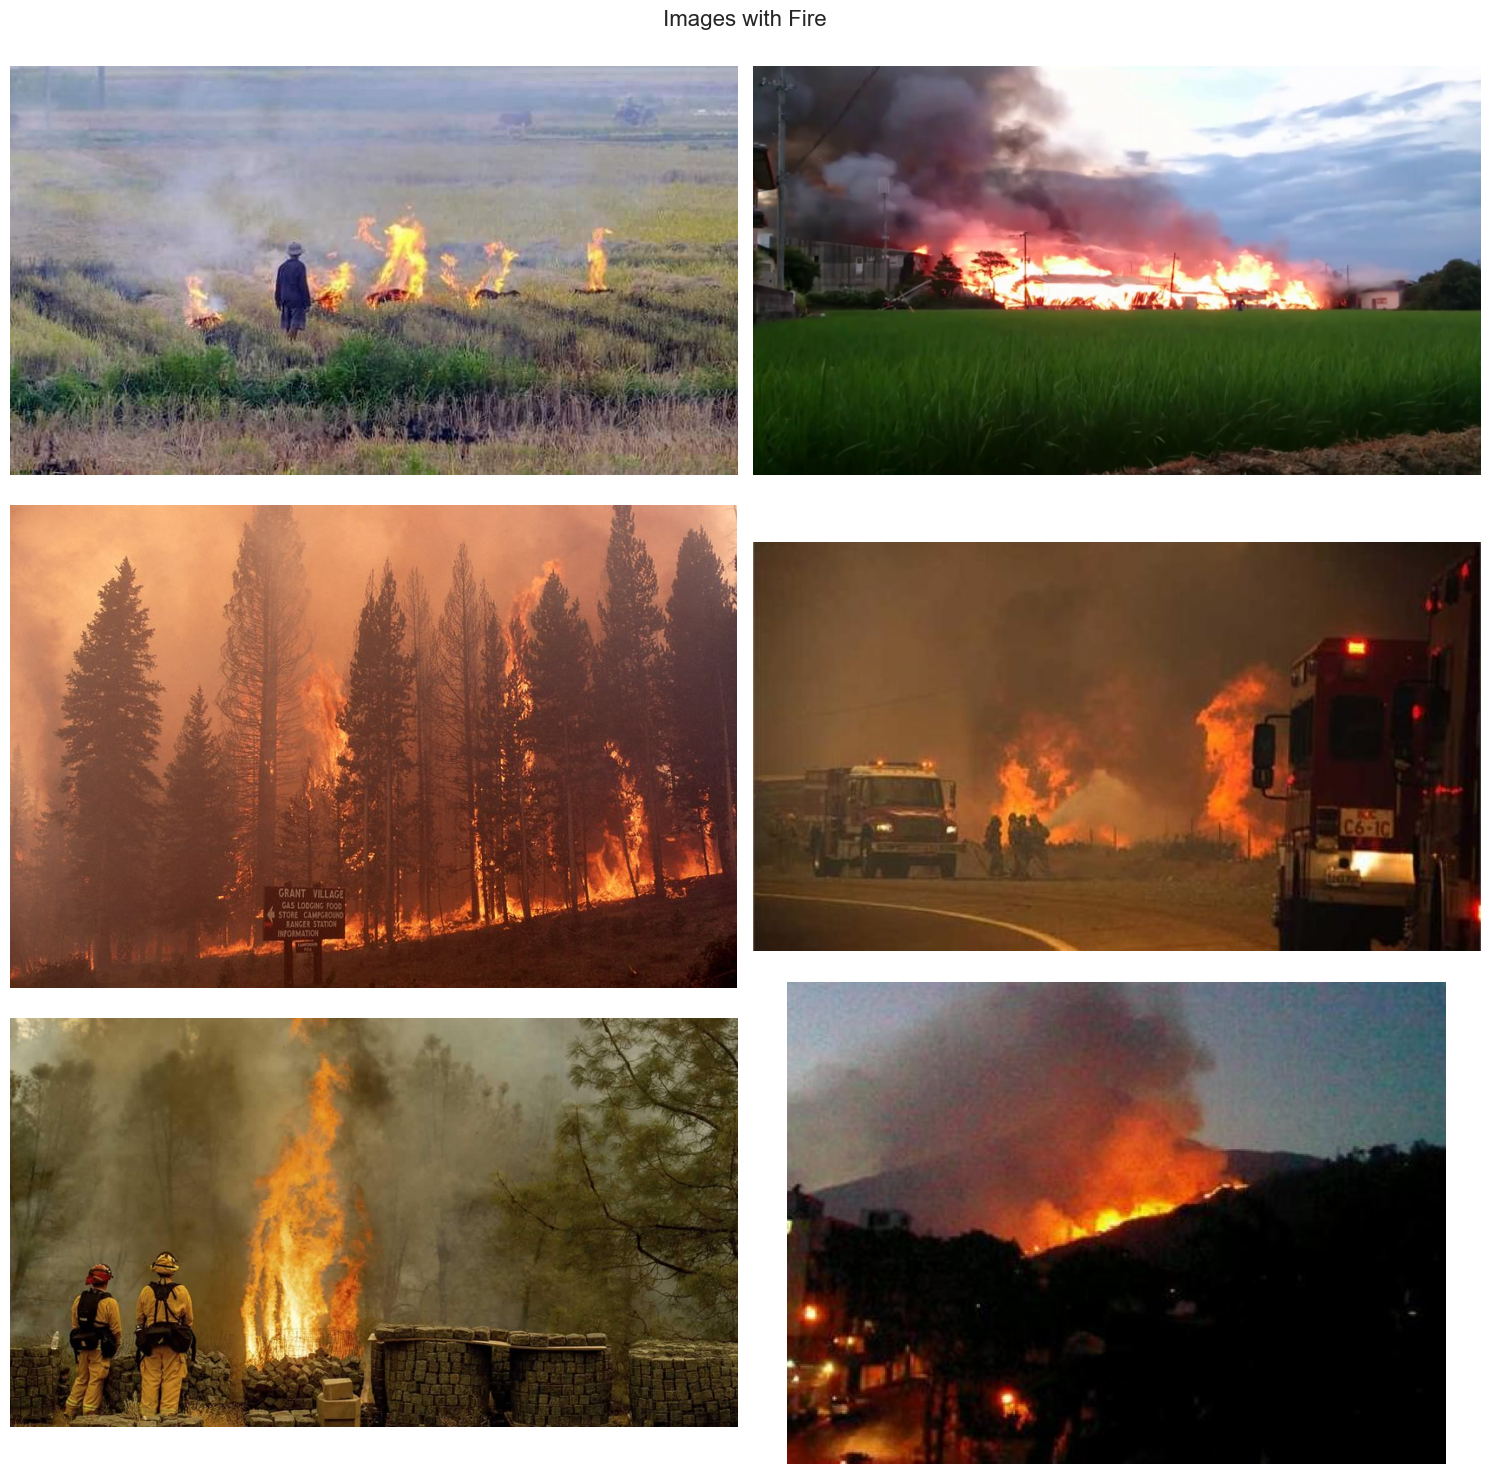

In [5]:
label = 'fire'  # Định nghĩa nhãn (label) cho ảnh có lửa
data = df[df['label'] == label]  # Lọc dữ liệu để lấy các hàng có nhãn là 'fire'
sns.set_style('dark')  # Thiết lập phong cách hiển thị của đồ thị thành 'dark'

pics = 6  # Số lượng ảnh muốn hiển thị

# Tạo một khung hình với các subplot
fig, ax = plt.subplots(int(pics / 2), 2, figsize=(15, 15))  # Tạo grid subplot (3x2) với kích thước 15x15
ax = ax.ravel()  # Chuyển mảng 2D của các axes thành mảng 1D để dễ dàng truy cập qua chỉ số

# Vòng lặp qua số lượng ảnh cần hiển thị
for i in range(int(pics / 2) * 2):  # Lặp qua tất cả các subplot
    try:
        # Lấy một đường dẫn ngẫu nhiên từ dữ liệu
        path = data.sample(1).iloc[0]['path']  # Chọn ngẫu nhiên một hàng từ dữ liệu và lấy đường dẫn ảnh
        
        img = Image.open(path)  # Mở ảnh từ đường dẫn
        
        # Chuyển ảnh thành mảng và chuẩn hóa giá trị pixel về khoảng [0, 1]
        img_array = np.array(img) / 255.0  # Chia giá trị pixel cho 255 để chuẩn hóa
        
        # Hiển thị ảnh trên subplot
        ax[i].imshow(img_array)  # Hiển thị ảnh trên trục con
        ax[i].axis('off')  # Tắt hiển thị các trục x và y
    except Exception as e:  # Xử lý ngoại lệ khi xảy ra lỗi
        print(f"Error loading image {i}: {str(e)}")  # In ra lỗi nếu không thể tải ảnh

# Thêm tiêu đề chung cho toàn bộ hình
plt.suptitle('Images with Fire', fontsize=16)  # Tiêu đề chính của hình
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplot để tránh bị chồng chéo
plt.show()  # Hiển thị toàn bộ hình


Tiền xử lí ảnh và chia tập train và val

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [8]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 3184 validated image filenames belonging to 2 classes.
Found 796 validated image filenames belonging to 2 classes.


In [9]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


Xây dựng model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,916,257 (30.20 MB)

 Trainable params: 7,916,257 (30.20 MB)

 Non-trainable params: 0 (0.00 B)

Compile model

In [13]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

Fitting

In [ ]:
model.fit(x=train_gen,batch_size=16,epochs=10,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/10
 91/100 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7228 - auc: 0.7701 - loss: 0.9647 - recall: 0.7610

Metrics plot

In [ ]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")